In [1]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

### Thresholding and Otsu's segmentation

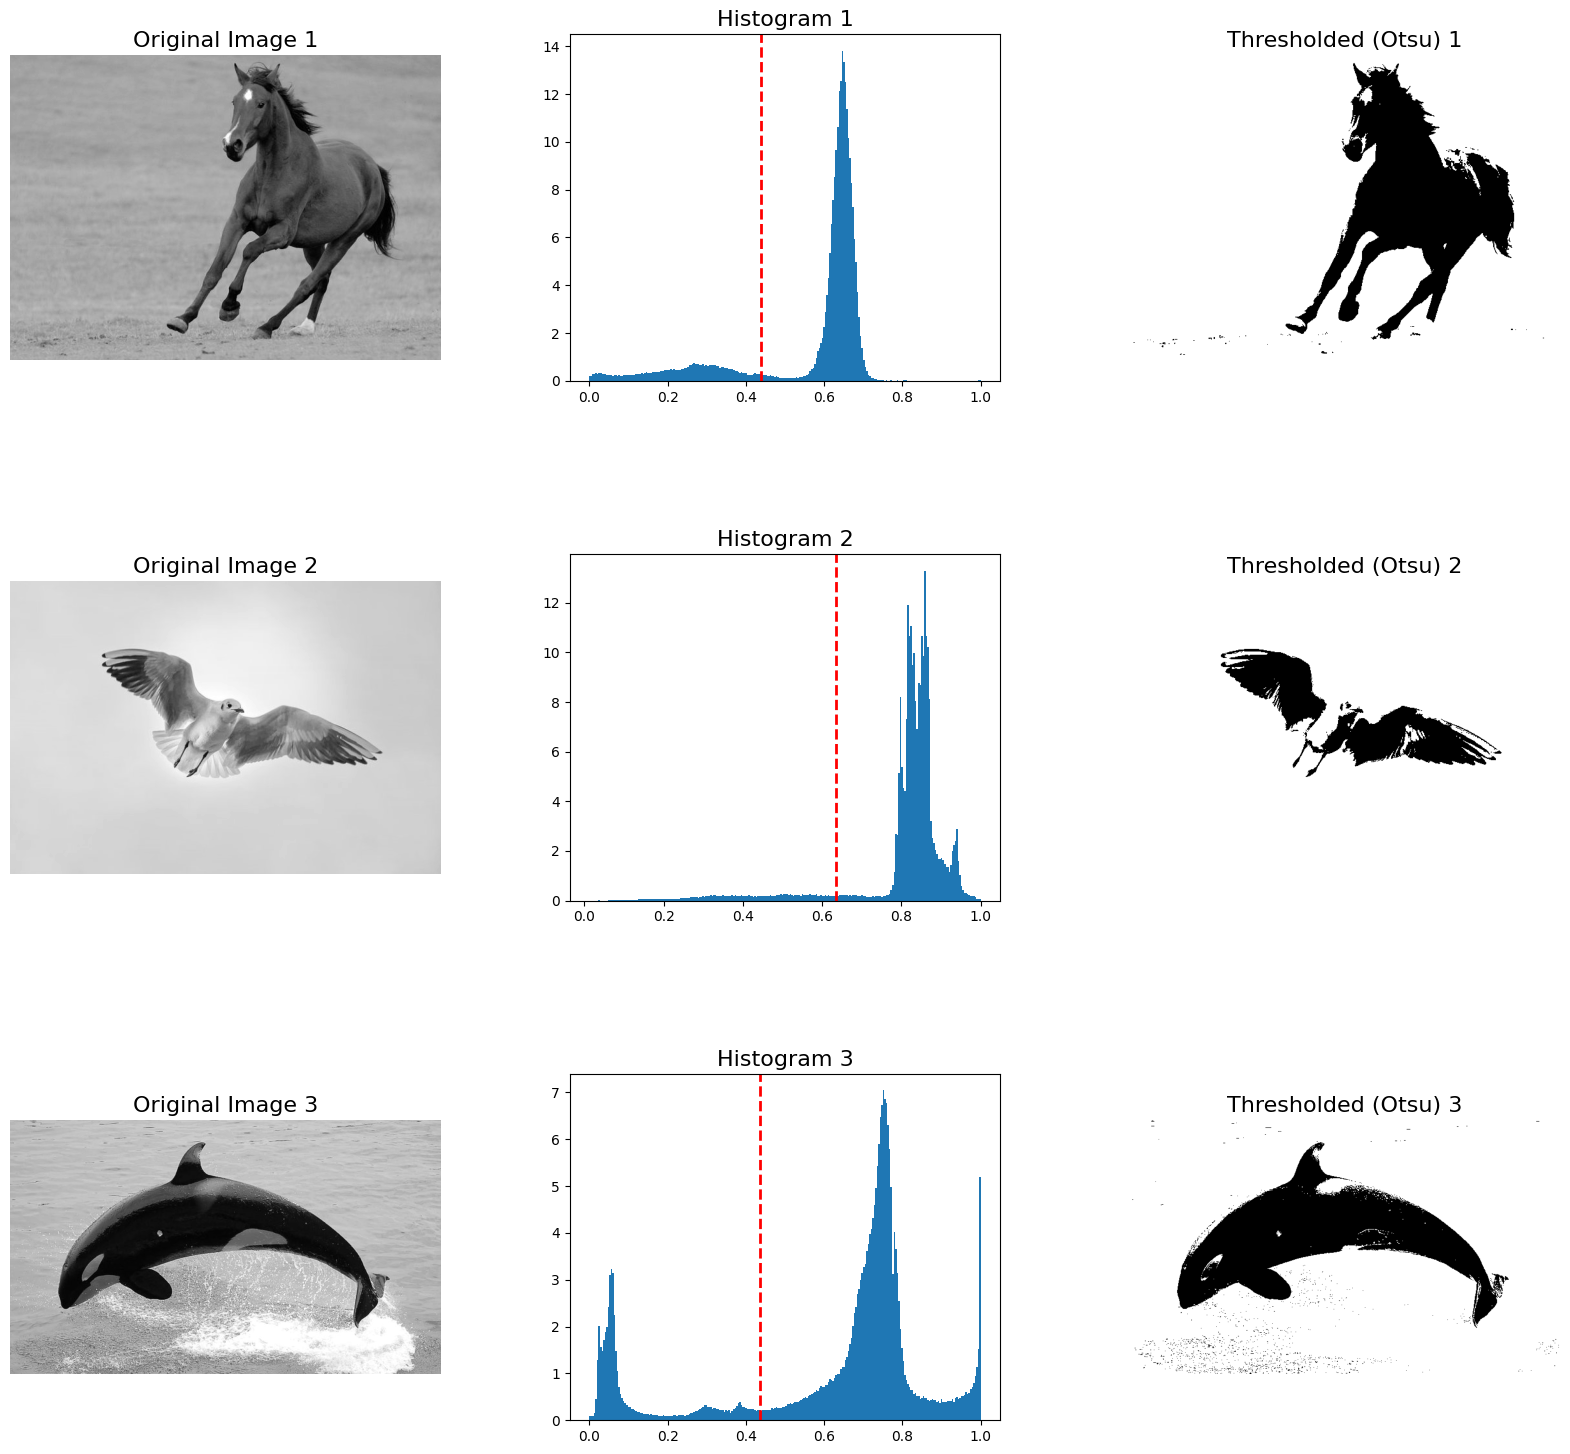

In [5]:
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Danh sách đường dẫn ảnh
image_paths = [
    '../images/horse.jpg',
    '../images/bird.jpg',
    '../images/whale.jpg'
]

# Tạo lưới subplot 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
ax = axes.ravel()

# Xử lý và hiển thị từng ảnh
for i, image_path in enumerate(image_paths):
    # Đọc ảnh và chuyển sang grayscale
    image = rgb2gray(imread(image_path))
    
    # Áp dụng thuật toán Otsu để tìm ngưỡng
    thresh = threshold_otsu(image)
    binary = image > thresh
    
    # Hiển thị ảnh gốc
    ax[i*3].imshow(image, cmap=plt.cm.gray)
    ax[i*3].set_title(f'Original Image {i+1}', size=16)
    ax[i*3].axis('off')
    
    # Hiển thị histogram
    ax[i*3+1].hist(image.ravel(), bins=256, density=True)
    ax[i*3+1].set_title(f'Histogram {i+1}', size=16)
    ax[i*3+1].axvline(thresh, color='r', linestyle='--', linewidth=2)
    
    # Hiển thị ảnh sau ngưỡng Otsu
    ax[i*3+2].imshow(binary, cmap=plt.cm.gray)
    ax[i*3+2].set_title(f'Thresholded (Otsu) {i+1}', size=16)
    ax[i*3+2].axis('off')

# Tắt trục của các subplot không sử dụng
for i in range(9, 9):
    ax[i].axis('off')

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Hiển thị
plt.show()

### Segmentation with SLIC

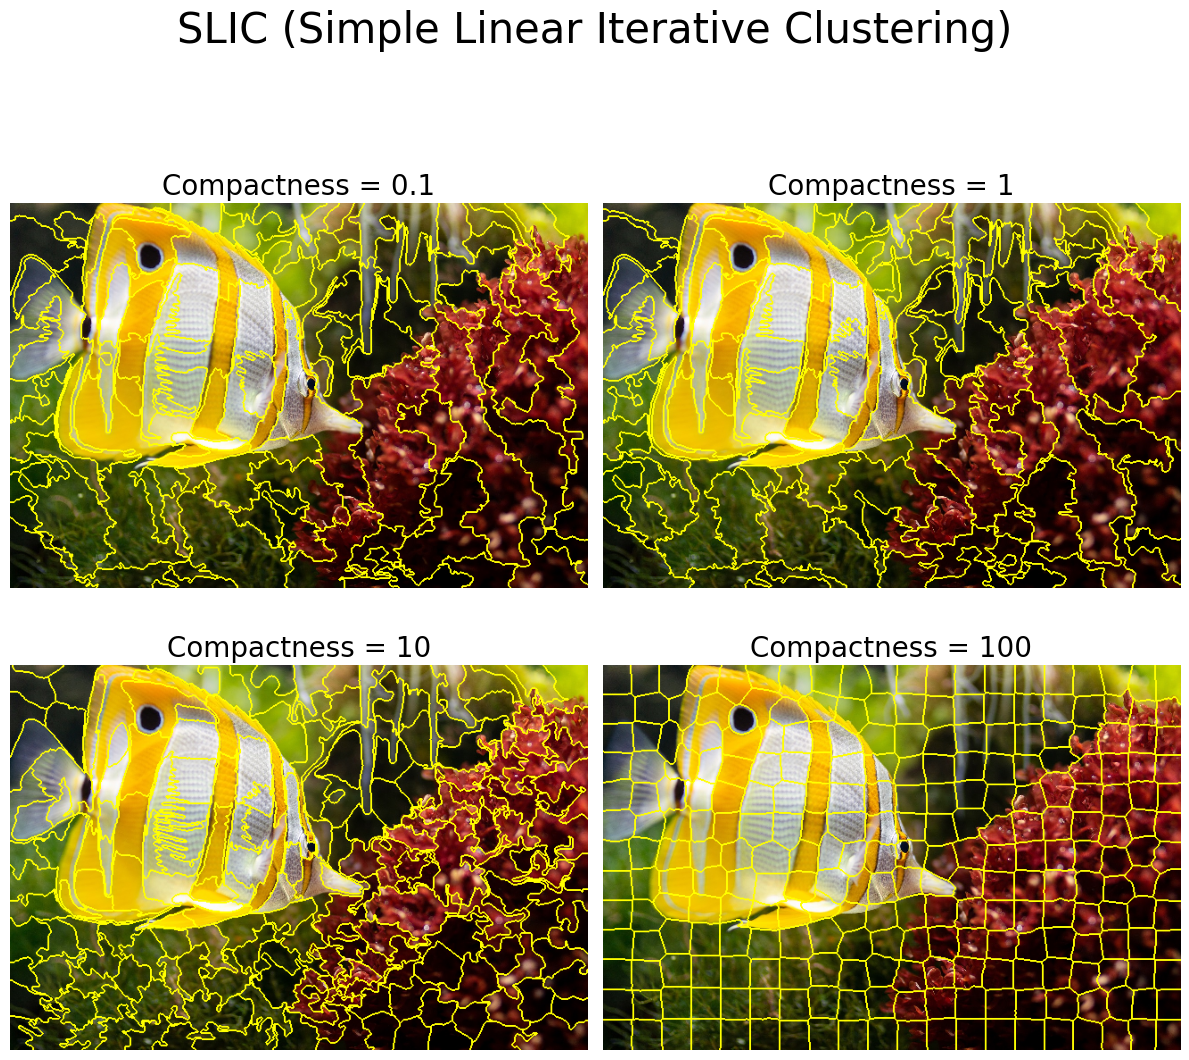

In [3]:
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import matplotlib.pyplot as plt

def plot_image(img, title):
    """Hiển thị một ảnh với tiêu đề và tắt trục."""
    plt.imshow(img)
    plt.title(title, size=20)
    plt.axis('off')

# Đọc và giảm kích thước ảnh
img = imread('../images/fish.jpg')[::2, ::2, :3]

# Cài đặt thông số hiển thị
plt.figure(figsize=(12, 12))
compactness_values = [0.1, 1, 10, 100]

# Lặp qua các giá trị compactness và hiển thị ảnh phân đoạn
for i, compactness in enumerate(compactness_values, start=1):
    plt.subplot(2, 2, i)
    segments = slic(img, n_segments=250, compactness=compactness, sigma=1)
    plot_image(mark_boundaries(img, segments), f'Compactness = {compactness}')

# Thiết lập tiêu đề chung và hiển thị
plt.suptitle('SLIC (Simple Linear Iterative Clustering)', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Segmentation with Watershed

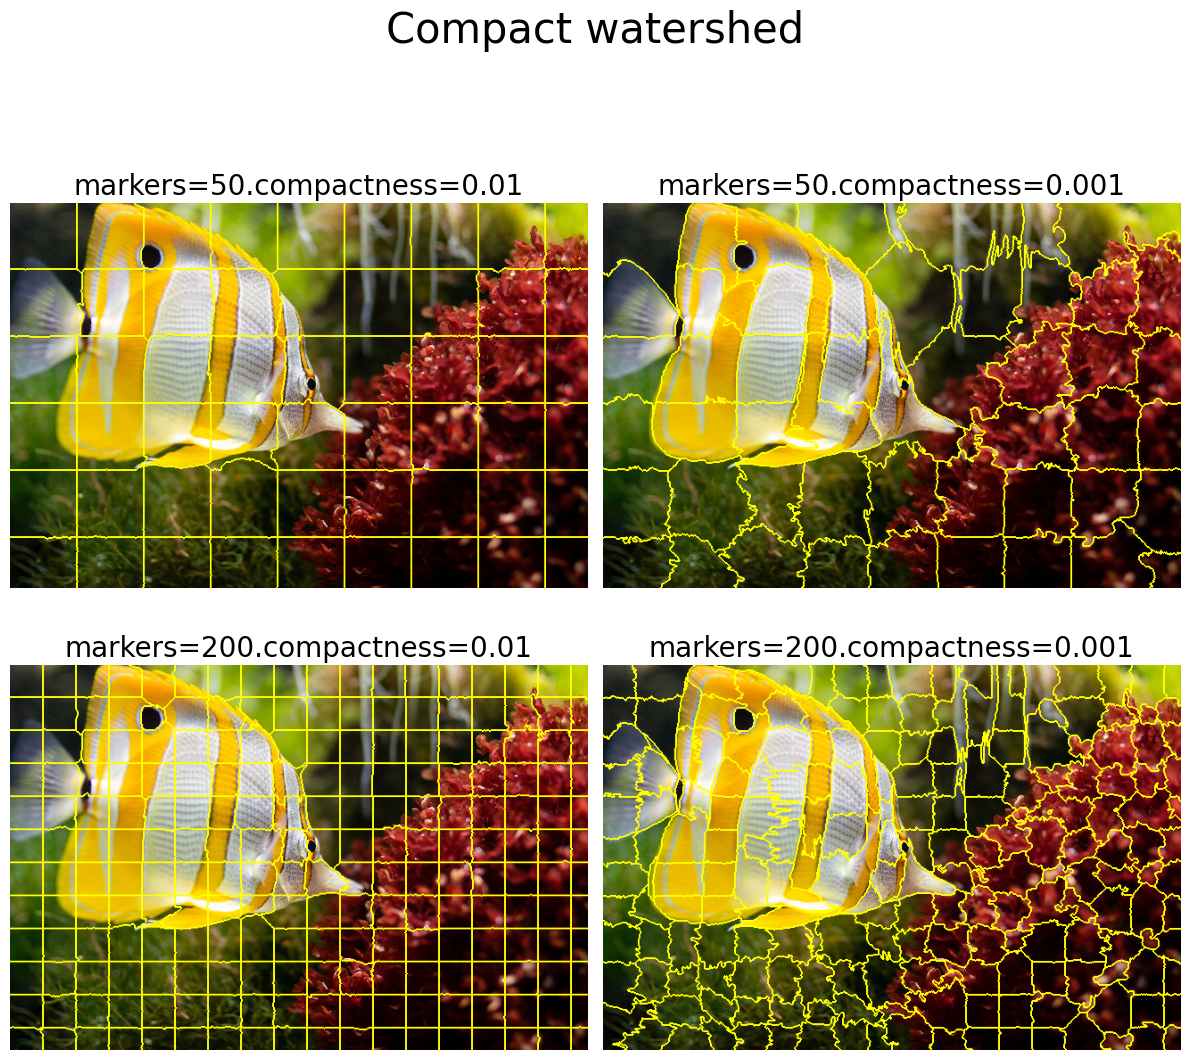

In [4]:
def plot_image(img, title):
    plt.imshow(img)
    plt.title(title, size=20)
    plt.axis('off')    
    
img = imread('../images/fish.jpg')[::2, ::2, :3]
gradient = sobel(rgb2gray(img))
plt.figure(figsize=(12,12))
i = 1
for markers in [50, 200]:
    for compactness in [0.01, 0.001]:
        plt.subplot(2,2,i)
        segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
        plot_image(mark_boundaries(img, segments_watershed), 'markers=' + str(markers) + '.compactness=' + str(compactness))
        i += 1
plt.suptitle('Compact watershed', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()